In [17]:
# why we need to use differentiable functions? And what is derivative?

from __future__ import annotations
%matplotlib inline

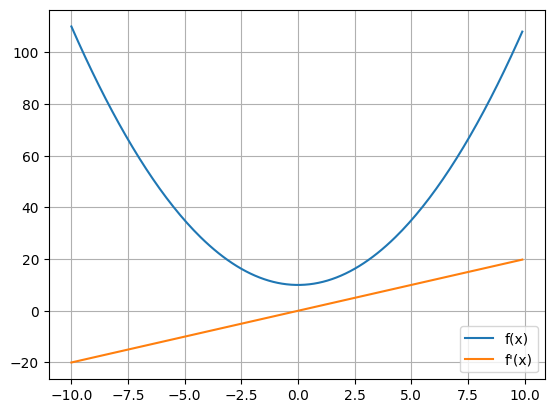

In [18]:
# What is a derivative? Or differentiable function?
# Let's start with a simple function and manual derivative calculation (based on calculus).
import numpy as np
import matplotlib.pyplot as plt

_input = np.arange(-10, 10, 0.1)

def f(x):
    return x**2 + 10

# pretend that we know the derivative of f(x) is f'(x) = 2 * x
def derivative_f(x):
    return 2 * x

# make plot a grid
plt.grid()
plt.plot(_input, f(_input), label='f(x)')
plt.plot(_input, derivative_f(_input), label='f\'(x)')
plt.legend()

# any intuition? probably not yet, if you do not know that from university or high school

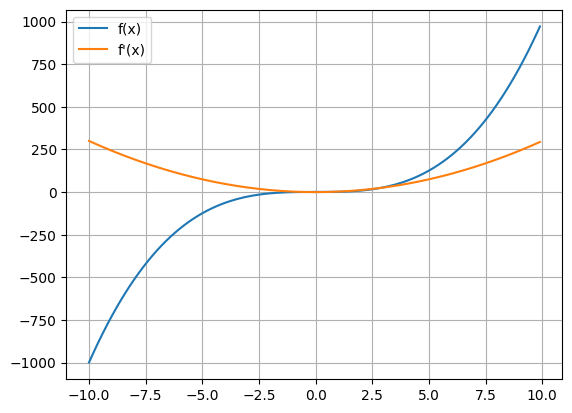

In [19]:
# let's test it on another monotonic function (increasing function)
import numpy as np
import matplotlib.pyplot as plt

_input = np.arange(-10, 10, 0.1)

def f(x):
    return x**3 + 1

def derivative_f(x):
    return 3 * (x**2)

# make plot a grid
plt.grid()
plt.plot(_input, f(_input), label='f(x)')
plt.plot(_input, derivative_f(_input), label='f\'(x)')
plt.legend()



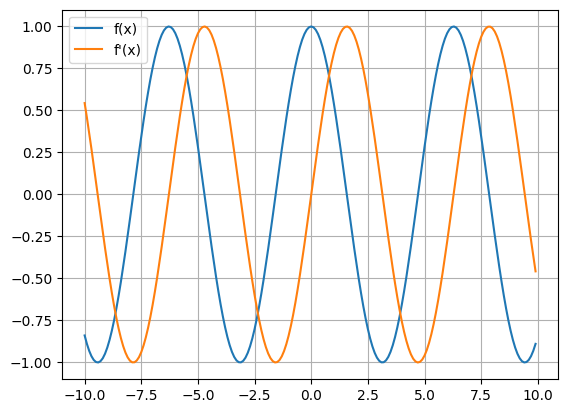

In [20]:
# we won't derive the derivative rules (we will just use them), but we will look at intuitions behind them

# derivative rules - https://www.mathsisfun.com/calculus/derivatives-rules.html
# it is basically just a set of rules how to calculate the derivative of a function

import numpy as np
import matplotlib.pyplot as plt

_input = np.arange(-10, 10, 0.1)

def f(x):
    return np.cos(x)

def derivative_f(x):
    return np.sin(x)

# make plot a grid
plt.grid()
plt.plot(_input, f(_input), label='f(x)')
plt.plot(_input, derivative_f(_input), label='f\'(x)')
plt.legend()



In [ ]:
# intuitions:
# negative derivative means that the function is decreasing
# positive derivative means that the function is increasing

# bigger derivative means that the function is increasing faster
# smaller derivative means that the function is increasing slower


# It is basically telling us something about the slope of the function (at a specific point)

In [ ]:
# If we look at the definition of the derivative
# https://en.wikipedia.org/wiki/Derivative

# then the important part is that there is `f(x + h) - f(x)` -> we approach the point `x` from the right side, normalized by `/h`
# it is function on it own so each specific point `x` will give us a different value of the derivative

In [21]:
# can we estimate it with that limit definition?
def f(x):
    return x**3 + 1

def derivative_f(x):
    return 3 * (x**2)

point = -5

print(f"{f(point)=}")
print(f"{derivative_f(point)=}")

f(point)=-124
derivative_f(point)=75


In [26]:
print("Manual:")
h = 0.00000000001 # small POSITIVE step size -> gradient is telling us about the slope on right side of the point
x = point # specific point - it is important because a function will behave differently at different points
gradient = (f(x + h) - f(x)) / h
gradient

Manual:


75.00062793042162

In [31]:
# !! main takeaway 1
# if we add h to x, then gradient is telling us what will be expected value of the function at that point (in a very small neighborhood of the point)
h = 0.00000000001
print(f(x + h))
print(f(x) + gradient*h)

-123.99999999925
-123.99999999925


In [ ]:
# let's visualize it
# https://www.geogebra.org/m/TymMwUtc

# (f(x + h) - f(x)) is basically giving two points on the function [x, f(x)] and [x + h, f(x + h)]
# and then we can calculate the slope of the line between these two points

In [ ]:
# What if we have a more complex function?

In [ ]:
# the most important rule is the chain rule - https://en.wikipedia.org/wiki/Chain_rule

In [32]:
#QUESITON:

# If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, 
# how fast is the car in respect to walking man?

print("\n" * 5)

In [34]:

# It is 2 × 4 = 8, so the car is 8 times as fast as the man.

# We can do it ourselves
# first - using rules
def car_with_respect_to_bicycle(speed_bicycle):
    return 2*speed_bicycle

def bicycle_with_respect_to_man(speed_man):
    return 4*speed_man

def derivative_car_with_respect_to_bicycle(x):
    return 2

def derivative_bicycle_with_respect_to_man(x):
    return 4

my_speed = 3

# derivative of f(g(x)) = derivative_f(g(x)) * derivative_g(x)
print("Car's speed with respect to my speed:")
print(car_with_respect_to_bicycle(bicycle_with_respect_to_man(my_speed)))

print("Gradient with chain rule:")
print(derivative_car_with_respect_to_bicycle(bicycle_with_respect_to_man(my_speed)) * derivative_bicycle_with_respect_to_man(my_speed))

print("\nGradien by wikipedia definition (without any clue about rules):")

h = 0.000001
gradient = (
                   car_with_respect_to_bicycle(
                       speed_bicycle=bicycle_with_respect_to_man(speed_man=(my_speed + h)))
                   - car_with_respect_to_bicycle(bicycle_with_respect_to_man(speed_man=my_speed))) / h
print(gradient)

Car's speed with respect to my speed:
24
Gradient with chain rule:
8

Gradien by wikipedia definition (without any clue about rules):
8.000000001118224


In [37]:
# and same about adding applies here:
print(car_with_respect_to_bicycle(speed_bicycle=bicycle_with_respect_to_man(speed_man=(my_speed + h))))
print(car_with_respect_to_bicycle(speed_bicycle=bicycle_with_respect_to_man(speed_man=(my_speed))) + gradient * h)

32
32.000000001118224


In [ ]:
# it is valid only in a small neighborhood of the point x (x + h) because the shape can change rapidly in non-linear functions

In [38]:
h = 10
# and same about adding applies here:
print(car_with_respect_to_bicycle(speed_bicycle=bicycle_with_respect_to_man(speed_man=(my_speed + h))))
print(car_with_respect_to_bicycle(speed_bicycle=bicycle_with_respect_to_man(speed_man=(my_speed))) + gradient * h)

104
104.00000001118224


In [39]:
# some more complex example

# first - using rules
def f(x):
    return x**2 + 1

def g(x):
    return x**2 + 10*x

def derivative_f(x):
    return 2 * x

def derivative_g(x):
    return 2 * x + 10

x = 1

# derivative of f(g(x)) = derivative_f(g(x)) * derivative_g(x)
print("Output of f(g(x)):")
print(f(g(x)))
print("Using chain rule (and derivative rules):")
print(derivative_f(g(x)) * derivative_g(x))

print("\n\nManual:")

h = 0.0001
gradient = (f(g(x + h)) - f(g(x))) / h
print(gradient)

Output of f(g(x)):
122
Using chain rule (and derivative rules):
264


Manual:
264.0166002399269


In [40]:
# when we move just a little bit (h) then derivative is telling us what will be a new value of the function
h = 0.00001

print(f(g(x + h)))
print(f(g(x)) + gradient*h) # !!

122.00264001660004
122.0026401660024


In [41]:
h = 1
print(f(g(x + h)))
print(f(g(x)) + gradient*h) # !!

577
386.0166002399269


In [ ]:
# from the code above we can conclude second important takeaway:

# chain rule allow us to split the function into two parts and calculate the derivative of each part separately
# then the final derivative is just a product of the derivatives of each part

# print(derivative_f(g(x)) * derivative_g(x))
#                    ^^^^
# we need a derivative of the outer function (f) at the point g(x), the actual x is on other place

In [42]:
# last piece is partial derivatives

# https://en.wikipedia.org/wiki/Partial_derivative - "same" definition as above (but "vectorized" for multiple inputs)

# https://www.wolframalpha.com/input?i=f%28x%2Cy%29+%3D+x%5E2++%2B+y%5E2+%2B+1

# https://en.wikipedia.org/wiki/Gradient#Relationship_with_derivative

def f(x, y):
    return x**2 + y**2 + 1

def derivative_f_x(x, y):
    return 2 * x

def derivative_f_y(x, y):
    return 2 * y

x = 1
y = 2
# derivative of f(x, y) = (derivative_f_x(x, y), derivative_f_y(x, y))
print("Output of f(x, y):")
print(f(x, y))
print("(Derivative of f with respect to x, derivative of f with respect to y):")
print((derivative_f_x(x, y), derivative_f_y(x, y)))

Output of f(x, y):
6
(Derivative of f with respect to x, derivative of f with respect to y):
(2, 4)


In [43]:
h = 0.0001
gradient_x = (f(x + h, y) - f(x, y)) / h
gradient_y = (f(x, y + h) - f(x, y)) / h
print(gradient_x, gradient_y)

2.000100000003613 4.0001000000078335


In [44]:
# now we know gradient in respect to each input - core of the backpropagation algorithm
print(f(x + h, y))
print(f(x, y) + gradient_x * h)

6.00020001
6.00020001


In [45]:
print(f(x, y + h))
print(f(x, y) + gradient_y * h)

6.000400010000001
6.000400010000001


In [ ]:
# we know how the change of one variable (x or y) will affect the output of the function - in some small neighborhood of the point

In [47]:
# How to use it in practice?
# because gradient is telling us how we change on the right side of the point and if it is positive then the function is increasing
# we usually want to minimize "something" - therefore we want to go in the opposite direction (to minimize the function)

# what input should I put as input to this function to get the minimum value? Any guesses, intuition?
def f(x, y):
    # return x**3 - y**2 + 1
    return (x**3 - y**2 + 1)**2

x = 1
y = 2

learning_rate = 1

for i in range(1000):
    h = 0.0001
    gradient_x = (f(x + h, y) - f(x, y)) / h
    gradient_y = (f(x, y + h) - f(x, y)) / h

    x = x - learning_rate * gradient_x * h
    y = y - learning_rate * gradient_y * h
    print(f"({x}, {y}) -> {f(x, y)}")

(1.0012000299859989, 1.9983997999919971) -> 3.960089447857015
(1.0023969248787035, 1.9968088763185312) -> 3.9205491524062253
(1.0035906777115184, 1.995227174506483) -> 3.881375649642752
(1.0047812815837514, 1.9936546405001394) -> 3.8425655157828125
(1.0059687296615238, 1.992091220656195) -> 3.8041153666203487
(1.0071530151786585, 1.990536861738839) -> 3.7660218568959354
(1.0083341314375787, 1.9889915109149143) -> 3.7282816796769636
(1.0095120718101662, 1.9874551157491345) -> 3.6908915657494745
(1.010686829738637, 1.9859276241993893) -> 3.6538482830210977
(1.0118583987363832, 1.984408984612101) -> 3.6171486359349703
(1.0130267723888244, 1.9828991457176701) -> 3.580789464894512
(1.0141919443542244, 1.9813980566259577) -> 3.5447676456986055
(1.0153539083645264, 1.9799056668218622) -> 3.5090800889872154
(1.0165126582261426, 1.978421926160948) -> 3.4737237396973892
(1.0176681878207652, 1.9769467848651336) -> 3.4386955765287945
(1.0188204911061365, 1.9754801935184538) -> 3.4039926114195684
(

In [23]:
# why gradient descent?
# because gradient is telling us how we change on the right side of the point and if it is positive then the function is increasing
# therefore we want to go in the opposite direction (to minimize the function)
x = 1
y = 2

for i in range(10):
    h = 0.0001
    gradient_x = (f(x + h, y) - f(x, y)) / h
    gradient_y = (f(x, y + h) - f(x, y)) / h

    x -= 100 * gradient_x * h
    y -= 100 * gradient_y * h
    print(f"({x}, {y}) -> {f(x, y)} (with gradient ({gradient_x}, {gradient_y}))")

(0.9799989999999639, 1.9599989999999217) -> 5.801994120001622 (with gradient (2.000100000003613, 4.0001000000078335))
(0.9603980199999853, 1.920798019999868) -> 5.611829390455306 (with gradient (1.9600979999978563, 3.9200980000053676))
(0.9411890595999886, 1.8823810595999007) -> 5.429195299451155 (with gradient (1.9208960399996755, 3.8416960399967337))
(0.9223642784079935, 1.8447324384079238) -> 5.253793631397543 (with gradient (1.8824781191995044, 3.764862119197687))
(0.9039159928398313, 1.8078367896398255) -> 5.085337980086848 (with gradient (1.8448285568162248, 3.6895648768098255))
(0.8858366729829861, 1.7716790538469844) -> 4.923553281041712 (with gradient (1.8079319856845188, 3.6157735792841095))
(0.8681189395233204, 1.7362444727700748) -> 4.7681753623837295 (with gradient (1.7717733459665652, 3.5434581076909666))
(0.8507555607329067, 1.70151858331473) -> 4.618950513483329 (with gradient (1.736337879041372, 3.4725889455344827))
(0.8337394495182551, 1.6674872116484423) -> 4.4756350

In [ ]:
# https://en.wikipedia.org/wiki/Gradient_descent (see Gradient Descent in 2D)
# Gradient - function whose value at a point gives the direction and the rate of fastest increase
# Gradient Descent - adding minus to go in the direction of the steepest descent

In [1]:
# and last step - how to combine it together
#
# https://en.wikipedia.org/wiki/Product_rule
# https://en.wikipedia.org/wiki/Chain_rule


def f(weight_1, inp_1, bias_1):
    return weight_1 * inp_1 + bias_1
    # derivative_f/with_respect_to_weight = inp
    # derivative_f/with_respect_to_inp = weight
    # derivative_f/with_respect_to_bias = 1

def second_f(weight_2, inp_2, bias_2):
    return weight_2 * inp_2 + bias_2
    # derivative_second_f/with_respect_to_first_f_2 = weight
    # derivative_second_f/with_respect_to_weight_2 = inp
    # derivative_second_f/with_respect_to_bias_2 = 1

    # derivative_second_f/with_respect_to_bias_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_bias_1
    # derivative_second_f/with_respect_to_inp_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_inp_1
    # derivative_second_f/with_respect_to_weight_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_weight_1


def my_MLP(inp, weights_first_layer, weights_second_layer, bias_first_layer, bias_second_layer):
    return second_f(weight_2=weights_second_layer,
                    inp_2=f(
                        weight_1=weights_first_layer,
                        inp_1=inp,
                        bias_1=bias_first_layer),
                    bias_2=bias_second_layer)


weights_first_layer = 0.1
weights_second_layer = 0.6
bias_first_layer = 0.9
bias_second_layer = 0.2

my_MLP(0.9, weights_first_layer, weights_second_layer, bias_first_layer, bias_second_layer)

0.794

In [5]:
# derivative_second_f/with_respect_to_first_f_2 = weight
# derivative_second_f/with_respect_to_weight_2 = inp
# derivative_second_f/with_respect_to_bias_2 = 1

# derivative_second_f/with_respect_to_bias_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_bias_1
# derivative_second_f/with_respect_to_inp_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_inp_1
# derivative_second_f/with_respect_to_weight_1 = chain_rule = derivative_second_f/with_respect_to_first_f_2 * derivative_f/with_respect_to_weight_1


point = 0.9
weights_first_layer = 0.1
weights_second_layer = 0.6
bias_first_layer = 0.9
bias_second_layer = 0.2

original = my_MLP(point, weights_first_layer, weights_second_layer, bias_first_layer, bias_second_layer)

h = 0.0001
weights_first_layer = 0.1 + h
weights_second_layer = 0.6
bias_first_layer = 0.9
bias_second_layer = 0.2

new = my_MLP(point, weights_first_layer, weights_second_layer, bias_first_layer, bias_second_layer)

derivative = (new - original) / h
derivative

0.5399999999999849

In [7]:
derivative_rules = weights_second_layer * point
derivative_rules

0.54

In [14]:
def f(weight_1, inp_1, bias_1):
    return weight_1 * inp_1 + bias_1

def second_f(weight_2, inp_2, bias_2):
    return weight_2 * inp_2 + bias_2

def loss(output, target):
    return (output - target) ** 2

h = 0.0001
inp = 0.9
target = 3
weights_first_layer = 0.1
weights_second_layer = 0.6
bias_first_layer = 0.9
bias_second_layer = 0.2

l = loss(second_f(weight_2=weights_second_layer,
                    inp_2=f(
                        weight_1=weights_first_layer,
                        inp_1=inp,
                        bias_1=bias_first_layer),
                    bias_2=bias_second_layer), target)
l_with_respect_to_w1 = loss(second_f(
                    weight_2=weights_second_layer,
                    inp_2=f(
                        weight_1=weights_first_layer + h,
                        inp_1=inp,
                        bias_1=bias_first_layer),
                    bias_2=bias_second_layer), target)

print((l_with_respect_to_w1 - l) / h)


-2.3824508400061006


In [16]:
# let's use the derivative rules to calculate the same derivative
derivative_rules = (2 * (second_f(weight_2=weights_second_layer,
                    inp_2=f(
                        weight_1=weights_first_layer,
                        inp_1=inp,
                        bias_1=bias_first_layer),
                    bias_2=bias_second_layer) - target)) * 1 * (weights_second_layer * inp)
derivative_rules

-2.38248

In [ ]:
# so to get value how to update the bias and weights we need to calculate the derivative from the output and move slowly to all part of the MLP

In [ ]:
# we cannot try adding +h to each variable and observe what is happening (in theory we can, but it is not efficient and we would need to run NN as many times as there are variables)

# -> derivative rules!!